# Quickstart

## Installation

First follow the [installation guide](./installation.md) to setup `pymer4` using `conda` or Google Collab

## Picking a model

`pymer4` provides 4 types of models that share a consistent API: 

| Model | Description |
|--------|-------------|
| [`lm()`](../api/models/lm.md) | linear regression fit via ordinary-least-squares (OLS) |
| [`glm()`](../api/models/glm.md) | generalized linear models (e.g logistic regression) fit via maximum-likelihood-estimate (MLE) |
| [`lmer()`](../api/models/lmer.md) | linear-mixed / multi-level models |
| [`glmer()`](../api/models/glmer.md) | geneneralized linear-mixed / multi-level models |

## Loading data

All models work with [`polars` Dataframes](https://docs.pola.rs/user-guide/getting-started/). If you are coming from `pandas` you can easily convert between libraries, but you should also *seriously consider* [switching](https://docs.pola.rs/user-guide/migration/pandas/):

- `pandas` -> `polars`: `import polars as pl; pl.DataFrame(pd_frame)`
- `polars` -> `pandas`: `pl_frame.to_pandas()`

Included are a number of datasets accessible with the `load_dataset()` function. Let's load the popular `mtcars` dataset:

In [1]:
from pymer4 import load_dataset

# Load the dataset
cars = load_dataset('mtcars')

# Get the columns we want
df = cars.select('mpg', 'cyl', 'wt')

# Show the first 5 rows
df.head()

mpg,cyl,wt
f64,i64,f64
21.0,6,2.62
21.0,6,2.875
22.8,4,2.32
21.4,6,3.215
18.7,8,3.44


## Fitting a model

Let's estimate the following univariate regression model:

$$
mpg \sim \beta_0 + \beta_1 * wt
$$

We can use `lm` class to create a model which simply requires a *formula* and some *data*

In [2]:
from pymer4.models  import lm

# Initialize model
model = lm('mpg ~ wt', data=df)

model

pymer4.models.lm(fitted=False, formula=mpg~wt)

Models make a copy of the input dataframe and store it in their `.data` attribute. As we'll soon see, this dataframe will be *augmented* with additional columns after fitting a model or applying any variable transforms

In [3]:
model.data.head()

mpg,cyl,wt
f64,i64,f64
21.0,6,2.62
21.0,6,2.875
22.8,4,2.32
21.4,6,3.215
18.7,8,3.44


We can use the `.fit()` method to estimate parameters and inferential statistics which are stored as inside a `model` object and can be accessed with a variety of *methods* (`model.method()`) or *attributes* (`model.attribute`).

In [4]:
model.fit()

Calling `.fit()` will create the following attributes for all models:
- `.params`: parameter estimates (coefficients) for model terms
- `.result_fit`: summary style table of parameter estimates and inferential stats
- `.result_fit_stat`: model quality-of-fit statistics
- augment `.data`: add fit and residual columns to the dataframe

In [5]:
# Inspect parameter estimates
model.params

term,estimate
str,f64
"""(Intercept)""",37.285126
"""wt""",-5.344472


We can see all this information quickly using the `.summary()` *method* (or by using `.fit(summary=True)`) which returns a nicely formatted [great table](https://posit-dev.github.io/great-tables/articles/intro.html)

In [6]:
model.summary()

GT(_tbl_data=shape: (2, 9)
┌─────────────┬───────────┬───────────┬───────────┬───┬───────────┬─────┬─────────┬───────┐
│ term        ┆ estimate  ┆ std_error ┆ conf_low  ┆ … ┆ t_stat    ┆ df  ┆ p_value ┆ stars │
│ ---         ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ --- ┆ ---     ┆ ---   │
│ str         ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ i64 ┆ str     ┆ str   │
╞═════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═════╪═════════╪═══════╡
│ (Intercept) ┆ 37.285126 ┆ 1.877627  ┆ 33.4505   ┆ … ┆ 19.857575 ┆ 30  ┆ <.001   ┆ ***   │
│ wt          ┆ -5.344472 ┆ 0.559101  ┆ -6.486308 ┆ … ┆ -9.559044 ┆ 30  ┆ <.001   ┆ ***   │
└─────────────┴───────────┴───────────┴───────────┴───┴───────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x15a23c5c0>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x116f05dc0>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(mpg~wt)', subtitle=Md(text='Number of observations: *32*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.7528*  \n            R-squared-adj: *0.7446*  \n            *F(1, 30) = 91.375, p = <.001*  \n            Log-likelihood: *-80*  \n            AIC: *166* | BIC: *170*  \n            Residual error: *3.046*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x15a51f6e0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x155917c80>, <great_tables._gt_data.FormatInfo object at 0x1594bc3b0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]

We can also print a more basic R-style `summary()`

In [7]:
model.summary(pretty=False)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10



You can always directly access this information from the model attributes:

In [8]:
# summary table
model.result_fit

term,estimate,std_error,conf_low,conf_high,t_stat,df,p_value
str,f64,f64,f64,f64,f64,i64,f64
"""(Intercept)""",37.285126,1.877627,33.4505,41.119753,19.857575,30,8.2418e-19
"""wt""",-5.344472,0.559101,-6.486308,-4.202635,-9.559044,30,1.2940e-10


In [9]:
# Quality-of-fit statistics
model.result_fit_stats

r_squared,adj_r_squared,sigma,statistic,p_value,df,logLik,AIC,BIC,deviance,df_residual,nobs
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64
0.752833,0.744594,3.045882,91.375325,1.2940e-10,1.0,-80.014714,166.029429,170.426637,278.321938,30,32


If we now inspect the `.data` attribute of the model we'll see several new columns that have been *appended* to the original data. These contain model predictions, residuals, and statistics per observation

In [10]:
model.data.head()

mpg,cyl,wt,fitted,resid,hat,sigma,cooksd,std_resid
f64,i64,f64,f64,f64,f64,f64,f64,f64
21.0,6,2.62,23.282611,-2.282611,0.043269,3.067494,0.013274,-0.766168
21.0,6,2.875,21.91977,-0.91977,0.035197,3.093068,0.001724,-0.307431
22.8,4,2.32,24.885952,-2.085952,0.058376,3.072127,0.015439,-0.705752
21.4,6,3.215,20.10265,1.29735,0.03125,3.088268,0.003021,0.432751
18.7,8,3.44,18.900144,-0.200144,0.032922,3.097722,0.000076,-0.066819


Which makes visual model inspection very easy

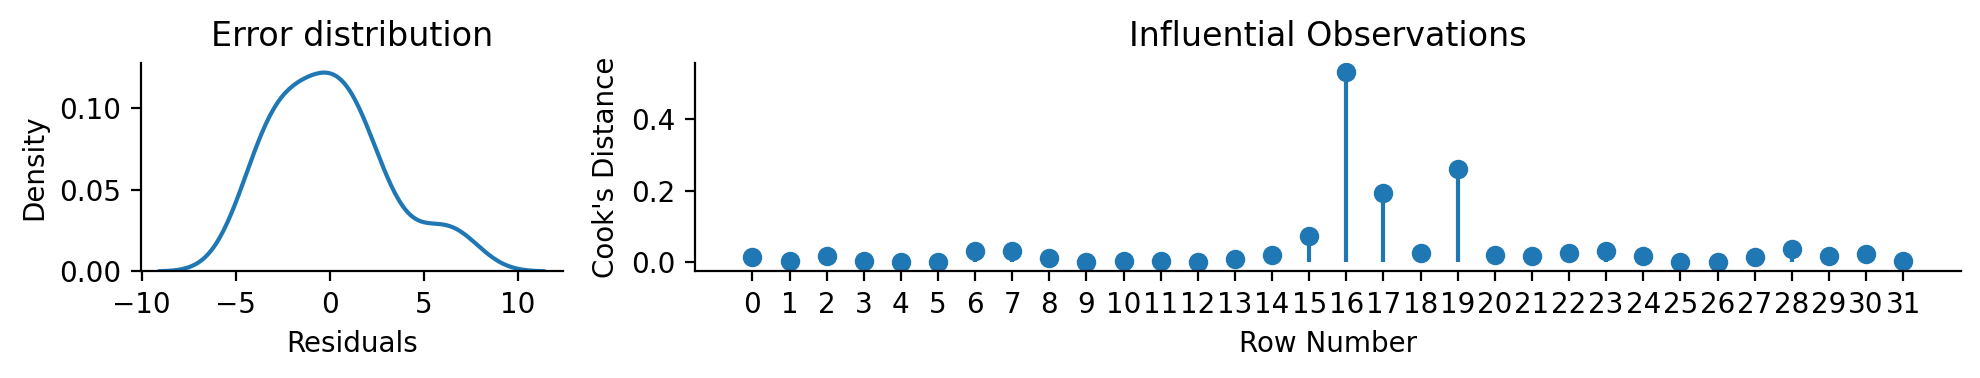

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup subplots
f = plt.figure(figsize=(10, 2))
gs = f.add_gridspec(1, 2, width_ratios=[1, 3])
left, right = f.add_subplot(gs[0]), f.add_subplot(gs[1])

# We can just use the 'resid' column for the first plot
left = sns.kdeplot(x='resid', data=model.data, ax=left)
left.set(xlabel='Residuals', title="Error distribution")

# And the 'cooksd' column to create a plot of observation influence
right.stem(model.data['cooksd'], basefmt=' ', label='Cook\'s Distance')
right.set(xlabel='Row Number', ylabel='Cook\'s Distance', title="Influential Observations", xticks=range(model.data.height))

sns.despine()
plt.tight_layout();

## Categorical predictors and predictor transforms

Let's say we wanted to extend our model to estimate a multiple regression including an interaction with a categorical-predictor $cyl$ 

$$mpg \sim \beta_0 + \beta_1 * wt  + \beta_2 * cyl + \beta_3 * wt * cyl$$

First we need some way to treat this variable as a *factor* and specify the order of it's levels. We may also want to use a particular *contrast* coding scheme and *center* our numeric predictors to aid interpretability and reduce multi-collinearity.

Since these types of operations are so popular, models have 3 utility methods to manipulate categorical and continuous predictors: `.set_*`, `.unset_*`, and `.show_*` that work with `.*_factors()`, `.*_contrasts()`, and `.*_transforms()` 

First we'll initialize our new model with a formula and data

In [46]:
model = lm('mpg ~ wt * cyl', data=df)

Then we'll use `.set_factors()` to treat $cyl$ as a factor with levels in the specified order. Omitting a specific order will use alphabetical order by default.

We can check any currently set factor variables with `.show_factors()`

In [47]:
# Set cyl as a factor with levels in this order
model.set_factors({'cyl': ['4', '6', '8']})

model.show_factors()

{'cyl': ['4', '6', '8']}


Factor variables adhere to a *contrast* coding scheme and using *treatment contrasts* (dummy-coding) by default just like R. This means each parameter represents the difference between the first level and the nth level. For $cyl$, that would be $6-4$ and $8-4$ as $4$ is the first level of $cyl$ based on the order we provided to `.set_factors()`

We can use `.show_contrasts()` to view the currently set coding scheme:


In [48]:
model.show_contrasts()

{'cyl': 'contr.treatment'}


For continuous variabiles, we can use `.set_transforms()` to apply a variety of transformations (e.g. `'center'`, `'scale'`, `'rank'`, `'zscore'`).

Let's mean center $wt$ so difference between levels of $cyl$ are interpretable when $wt$ is equal to its mean.

In [49]:
# Mean center wt
model.set_transforms({'wt': 'center'})

model.show_transforms()

{'wt': 'center'}


If we now inspect the `.data` attribute of the model, we can see that `cyl` an **enum** type which is how `polars` treats categorical variables. We also have a *new* column `wt_orig` that contains the *original* values of $wt$, while `wt` contains the transformed (mean-centered) values

In [50]:
model.data.head()

mpg,cyl,wt,wt_orig
f64,enum,f64,f64
21.0,"""6""",-0.59725,2.62
21.0,"""6""",-0.34225,2.875
22.8,"""4""",-0.89725,2.32
21.4,"""6""",-0.00225,3.215
18.7,"""8""",0.22275,3.44


Now our parameter estimates represented comparisons specified by our contrasts and transformations:

In [51]:
model.fit()
model.params

term,estimate
str,f64
"""(Intercept)""",21.403304
"""wt""",-5.647025
"""cyl6""",-1.938755
"""cyl8""",-4.588896
"""wt:cyl6""",2.866919
"""wt:cyl8""",3.454587


And we inspect our model's design-matrix using the `.design_matrix` attribute to see how our predictors are represented. Notice how level $4$ for the $cyl$ factor is not represented in design matrix because it's the reference level in the treatment coding scheme

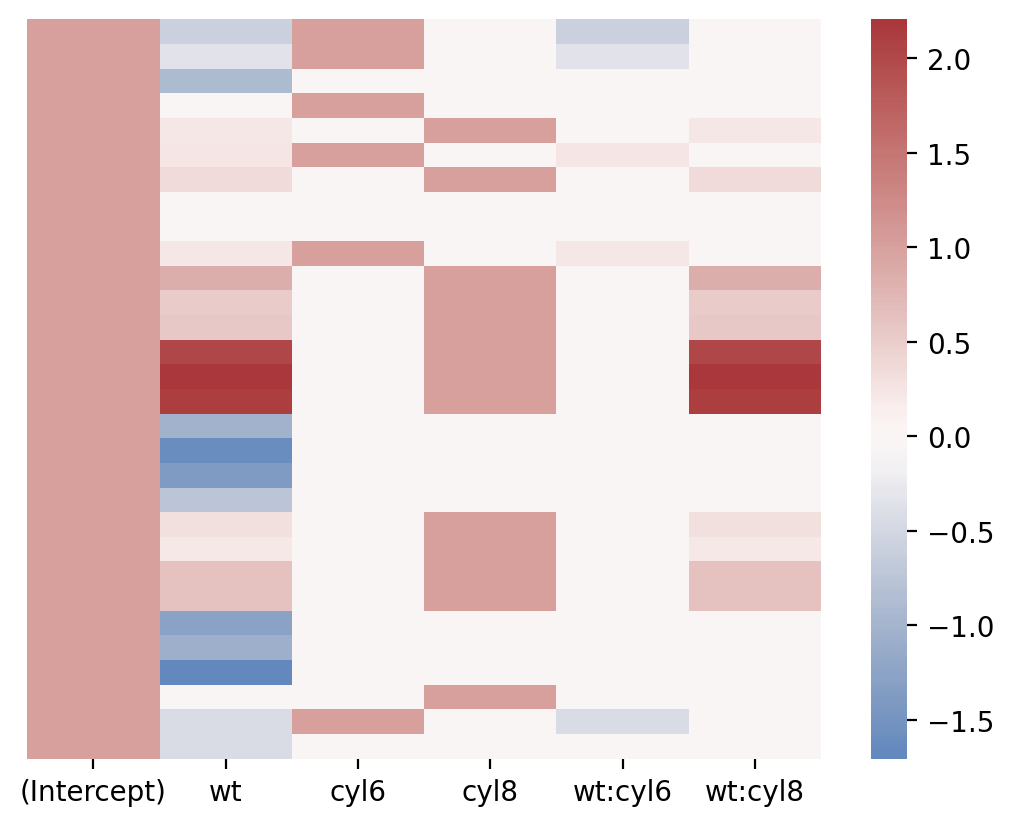

In [36]:
import seaborn as sns

sns.heatmap(model.design_matrix, xticklabels=model.design_matrix.columns, yticklabels=[], cmap='vlag', center=0);

We can switch this to another supported contrast like sum-to-zero contrasts using `'contr.sum'` 

In [52]:
model.set_contrasts({'cyl': 'contr.sum'})
model.fit()
model.params

term,estimate
str,f64
"""(Intercept)""",19.22742
"""wt""",-3.539856
"""cyl1""",2.175884
"""cyl2""",0.237128
"""wt:cyl1""",-2.107169
"""wt:cyl2""",0.75975


And inspect how our design matrix has changed. Notice that the columns for $cyl$ now contain negative values to ensure the contrasts sum-to-zero

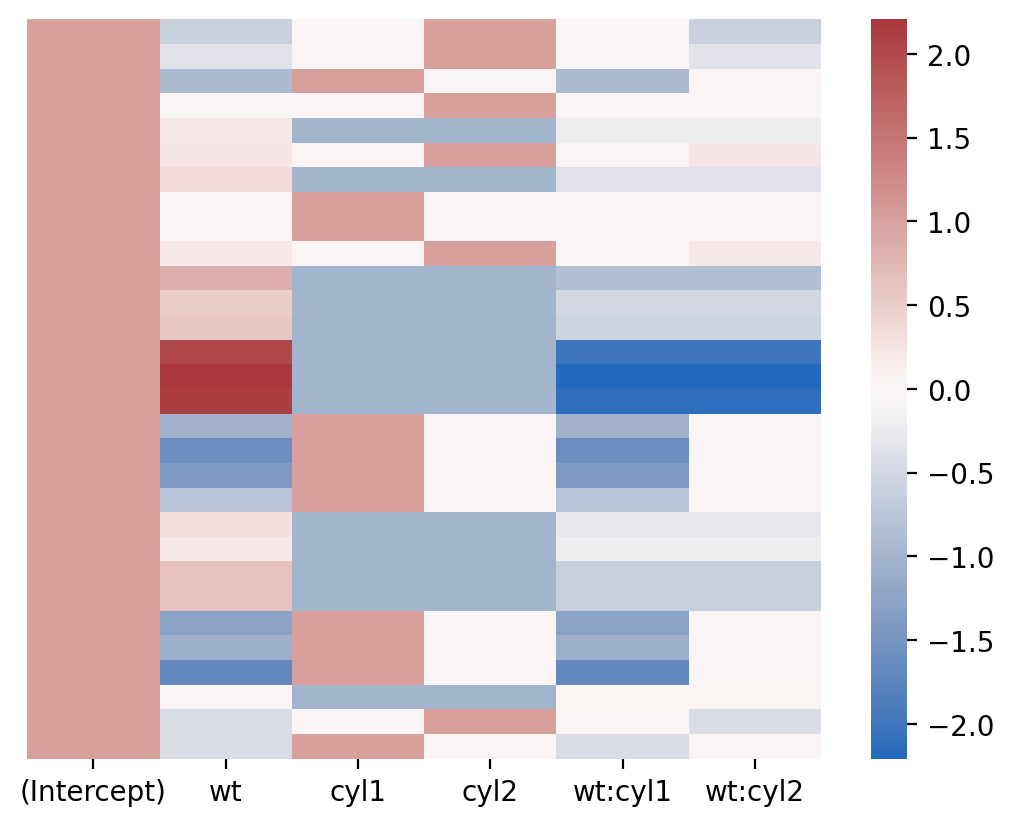

In [38]:
sns.heatmap(model.design_matrix, xticklabels=model.design_matrix.columns, yticklabels=[], cmap='vlag', center=0);

Alternatively we can test a *specific* hypothesis by using a custom contrast across factor levels (numeric values that add up to 0). This is specified based on the order of levels set when using `.set_factors()`, or alphabetically by default.

If we inspect the data we can see that there seems to be an approximately linear trend across levels of $cyl$


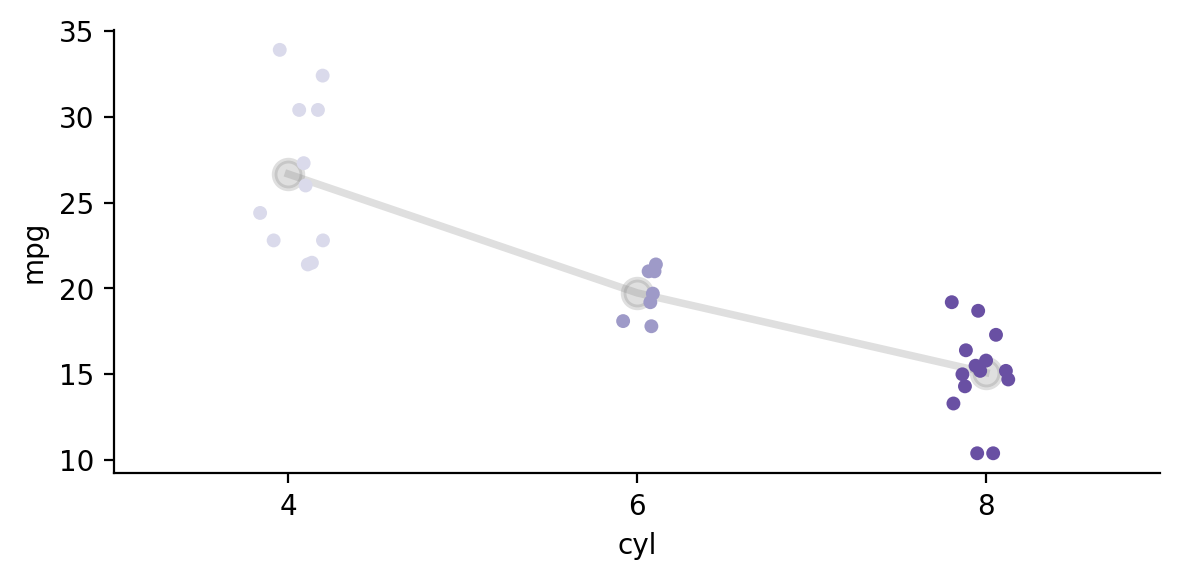

In [53]:
import seaborn as sns

grid = sns.FacetGrid(data=model.data, palette='Purples', aspect=2)

grid.map(sns.pointplot, 'cyl', 'mpg', color='gray', order=['4','6','8'], alpha=.25, errorbar=None, markersize=10)

grid.map_dataframe(sns.stripplot, 'cyl', 'mpg', order=['4','6','8'], hue='cyl', palette='Purples', legend=True);

We can test this by specifying a linear contrast across levels of `cyl` such that 4 < 6 < 8. 

The `normalize` argument simply scales our contrasts for us to match the polynomial used in R:

In [54]:
model.set_contrasts({'cyl':[-1, 0, 1]}, normalize=True)
model.show_contrasts()

{'cyl': array([-0.70710678,  0.        ,  0.70710678])}


Now $cyl1$ below reflects *this specific* comparison: a linear trend across levels  
$cyl2$ represents an automatically computed orthogonal comparison, in this case a *quadratic* trend across $cyl$ levels. 


In [55]:
model.fit(summary=True)

GT(_tbl_data=shape: (6, 9)
┌─────────────┬───────────┬───────────┬───────────┬───┬───────────┬─────┬──────────┬───────┐
│ term        ┆ estimate  ┆ std_error ┆ conf_low  ┆ … ┆ t_stat    ┆ df  ┆ p_value  ┆ stars │
│ ---         ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ --- ┆ ---      ┆ ---   │
│ str         ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ i64 ┆ str      ┆ str   │
╞═════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═════╪══════════╪═══════╡
│ (Intercept) ┆ 19.22742  ┆ 0.666794  ┆ 17.856807 ┆ … ┆ 28.835643 ┆ 26  ┆ <.001    ┆ ***   │
│ wt          ┆ -3.539856 ┆ 1.081023  ┆ -5.76193  ┆ … ┆ -3.274544 ┆ 26  ┆ 0.002993 ┆ **    │
│ cyl1        ┆ -3.244839 ┆ 1.238169  ┆ -5.789933 ┆ … ┆ -2.620675 ┆ 26  ┆ 0.01446  ┆ *     │
│ cyl2        ┆ -0.290422 ┆ 1.065185  ┆ -2.47994  ┆ … ┆ -0.272649 ┆ 26  ┆ 0.7873   ┆       │
│ wt:cyl1     ┆ 2.442762  ┆ 1.150647  ┆ 0.077572  ┆ … ┆ 2.122946  ┆ 26  ┆ 0.04344  ┆ *     │
│ wt:cyl2     ┆ -0.9305   ┆ 2.384884  ┆ -5.832699 ┆ … ┆ -0.390166 ┆ 26  ┆ 0.6996   ┆       │
└─────────────┴───────────┴───────────┴───────────┴───┴───────────┴─────┴──────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x334b50d70>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x33511ff20>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(mpg~wt*cyl)', subtitle=Md(text='Number of observations: *32*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.8616*  \n            R-squared-adj: *0.8349*  \n            *F(5, 26) = 32.362, p = <.001*  \n            Log-likelihood: *-70*  \n            AIC: *155* | BIC: *165*  \n            Residual error: *2.449*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=3, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespac

The various `.set_*`, `.show_*`, and `.unset_*` methods make it very easy to *re-parameterize* a model and re-fit it. For example, we can verify that our custom linear hypothesis is equivalent to using the built-in `contr.poly` coding which estimates $k-1$ polynomial trends for any $k$ level predictor.

Although named differently, all the parameter estimates are the same:

In [56]:
# Set new contrast 
model.set_contrasts({'cyl': 'contr.poly'})

# Refit
model.fit(summary=True)

GT(_tbl_data=shape: (6, 9)
┌─────────────┬───────────┬───────────┬───────────┬───┬───────────┬─────┬──────────┬───────┐
│ term        ┆ estimate  ┆ std_error ┆ conf_low  ┆ … ┆ t_stat    ┆ df  ┆ p_value  ┆ stars │
│ ---         ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ --- ┆ ---      ┆ ---   │
│ str         ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ i64 ┆ str      ┆ str   │
╞═════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═════╪══════════╪═══════╡
│ (Intercept) ┆ 19.22742  ┆ 0.666794  ┆ 17.856807 ┆ … ┆ 28.835643 ┆ 26  ┆ <.001    ┆ ***   │
│ wt          ┆ -3.539856 ┆ 1.081023  ┆ -5.76193  ┆ … ┆ -3.274544 ┆ 26  ┆ 0.002993 ┆ **    │
│ cyl.L       ┆ -3.244839 ┆ 1.238169  ┆ -5.789933 ┆ … ┆ -2.620675 ┆ 26  ┆ 0.01446  ┆ *     │
│ cyl.Q       ┆ -0.290422 ┆ 1.065185  ┆ -2.47994  ┆ … ┆ -0.272649 ┆ 26  ┆ 0.7873   ┆       │
│ wt:cyl.L    ┆ 2.442762  ┆ 1.150647  ┆ 0.077572  ┆ … ┆ 2.122946  ┆ 26  ┆ 0.04344  ┆ *     │
│ wt:cyl.Q    ┆ -0.9305   ┆ 2.384884  ┆ -5.832699 ┆ … ┆ -0.390166 ┆ 26  ┆ 0.6996   ┆       │
└─────────────┴───────────┴───────────┴───────────┴───┴───────────┴─────┴──────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x334f9afc0>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x335681790>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(mpg~wt*cyl)', subtitle=Md(text='Number of observations: *32*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.8616*  \n            R-squared-adj: *0.8349*  \n            *F(5, 26) = 32.362, p = <.001*  \n            Log-likelihood: *-70*  \n            AIC: *155* | BIC: *165*  \n            Residual error: *2.449*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=3, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespac

## ANOVA tables

With more than 2 levels of a categorical predictor, you may be interested in an omnibus F-test across all factor levels, i.e. an ANOVA style table. To make this as easy and valid as possible (e.g. handling unbalanced designs) just create your factors with `.set_factors()` and use `.anova()` instead of `.fit()`

By default, `.anova()` will ignore any contrasts you may have set with `.set_contrasts()` and automatically use an appropriate orthogonal coding scheme to compute valid type-3 SS tests. This the default to make ANOVA-style analyses less error prone, and facilitate custom regression parameterizations without affecting ANOVA tests. 

:::{note}
*You can change this and use your particular contrasts for an ANOVA test with type-1 SS by setting changing the default setting to `auto_ss_3=False`*
:::

In [57]:
model.anova(summary=True)

GT(_tbl_data=shape: (3, 6)
┌────────────┬─────┬──────┬─────────┬──────────┬───────┐
│ model term ┆ df1 ┆ df2  ┆ F_ratio ┆ p_value  ┆ stars │
│ ---        ┆ --- ┆ ---  ┆ ---     ┆ ---      ┆ ---   │
│ str        ┆ f64 ┆ f64  ┆ f64     ┆ str      ┆ str   │
╞════════════╪═════╪══════╪═════════╪══════════╪═══════╡
│ wt         ┆ 1.0 ┆ 26.0 ┆ 10.723  ┆ 0.002993 ┆ **    │
│ cyl        ┆ 2.0 ┆ 26.0 ┆ 3.951   ┆ 0.03175  ┆ *     │
│ wt:cyl     ┆ 2.0 ┆ 26.0 ┆ 2.266   ┆ 0.1239   ┆       │
└────────────┴─────┴──────┴─────────┴──────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x335758800>, _boxhead=Boxhead([ColInfo(var='model term', type=<ColInfoTypeEnum.default: 1>, column_label='model term', column_align='left', column_width=None), ColInfo(var='df1', type=<ColInfoTypeEnum.default: 1>, column_label='df1', column_align='right', column_width=None), ColInfo(var='df2', type=<ColInfoTypeEnum.default: 1>, column_label='df2', column_align='right', column_width=None), ColInfo(var='F_ratio', type=<ColInfoTypeEnum.default: 1>, column_label='F_ratio', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p_value', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x3356b6930>, _spanners=Spanners([]), _heading=Heading(title='ANOVA (Type III tests)', subtitle=None, preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x3357592e0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x335758e90>, <great_tables._gt_data.FormatInfo object at 0x335759e20>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom

Just like `.fit()` the dataframe results of `.anova()` are accessible via `.result_anova`

In [58]:
model.result_anova

model term,df1,df2,F_ratio,p_value
str,f64,f64,f64,f64
"""wt""",1.0,26.0,10.723,0.002993
"""cyl""",2.0,26.0,3.951,0.031753
"""wt:cyl""",2.0,26.0,2.266,0.123857


## Comparing models

`pymer4` offers a general-purpose `compare()` function to compare 2 or more models using an F-test or Likelihood-Ratio-Test. 

For linear models, an ANOVA F-test for a factor variable is equivalent to a *nested model comparison*. If we create a new model without the interaction term and compare it to the full model, we can reproduce the same result as the F-test in the ANOVA table above. Both approaches suggest the interaction doesn't add much beyond the additive model.

In [59]:
from pymer4.models import compare

# Model without interaction
add_only = lm('mpg ~ wt + cyl', data=df)
add_only.set_factors({'cyl': ['4', '6', '8']})

# Compare the models
compare(add_only, model)

GT(_tbl_data=shape: (2, 11)
┌────────────┬────────────┬────────────┬────────┬───┬──────────┬────────┬───────┬─────┐
│ AIC        ┆ BIC        ┆ logLik     ┆ Res_Df ┆ … ┆ F        ┆ Pr(>F) ┆ stars ┆ ids │
│ ---        ┆ ---        ┆ ---        ┆ ---    ┆   ┆ ---      ┆ ---    ┆ ---   ┆ --- │
│ f64        ┆ f64        ┆ f64        ┆ f64    ┆   ┆ f64      ┆ str    ┆ str   ┆ i64 │
╞════════════╪════════════╪════════════╪════════╪═══╪══════════╪════════╪═══════╪═════╡
│ 156.622328 ┆ 163.951007 ┆ -73.311164 ┆ 28.0   ┆ … ┆ 0.0      ┆        ┆       ┆ 1   │
│ 155.481091 ┆ 165.741242 ┆ -70.740546 ┆ 26.0   ┆ … ┆ 2.265769 ┆ 0.124  ┆       ┆ 2   │
└────────────┴────────────┴────────────┴────────┴───┴──────────┴────────┴───────┴─────┘, _body=<great_tables._gt_data.Body object at 0x33575b920>, _boxhead=Boxhead([ColInfo(var='ids', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='right', column_width=None), ColInfo(var='AIC', type=<ColInfoTypeEnum.default: 1>, column_label='AIC', column_align='right', column_width=None), ColInfo(var='BIC', type=<ColInfoTypeEnum.default: 1>, column_label='BIC', column_align='right', column_width=None), ColInfo(var='logLik', type=<ColInfoTypeEnum.default: 1>, column_label='logLik', column_align='right', column_width=None), ColInfo(var='Res_Df', type=<ColInfoTypeEnum.default: 1>, column_label='Res_Df', column_align='right', column_width=None), ColInfo(var='RSS', type=<ColInfoTypeEnum.default: 1>, column_label='RSS', column_align='right', column_width=None), ColInfo(var='Df', type=<ColInfoTypeEnum.default: 1>, column_label='Df', column_align='right', column_width=None), ColInfo(var='Sum of Sq', type=<ColInfoTypeEnum.default: 1>, column_label='Sum of Sq', column_align='right', column_width=None), ColInfo(var='F', type=<ColInfoTypeEnum.default: 1>, column_label='F', column_align='right', column_width=None), ColInfo(var='Pr(>F)', type=<ColInfoTypeEnum.default: 1>, column_label='Pr(>F)', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x33575b740>, _spanners=Spanners([]), _heading=Heading(title='Analysis of Deviance Table', subtitle=Md(text='Model 1: lm(mpg~wt+cyl)   \nModel 2: lm(mpg~wt*cyl)   \n'), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x33575bd10>, _formats=[<great_tables._gt_data.FormatInfo object at 0x33575b8c0>, <great_tables._gt_data.FormatInfo object at 0x33575b080>], _substitutions=[<great_tables._gt_data.FormatInfo object at 0x335758260>], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='

## Marginal estimates & contrasts ("post-hoc" tests)

In models with multiple terms and factor levels you're often interested in comparisons between specific factor levels or *marginal effects*. This is often referred to as "post-hoc" or "cell means" tests in ANOVA-speak, but marginal effects estimation is an extremely powerful *general-purpose*& approach for understanding and interrogating a statistical model.

Every model supports the `.emmeans()` method that takes one or more predictors of the same type and generates marginal estimates while other predictors are held at their means.

For example, using $cyl$ will return the average $mpg$ for each level of $cyl$ while holding $wt$ at its mean (0 in this case due to centering)

In [60]:
model.emmeans('cyl')

cyl,emmean,SE,df,lower_CL,upper_CL
cat,f64,f64,f64,f64,f64
"""4""",21.403304,1.465893,26.0,17.66308,25.143528
"""6""",19.464549,0.967159,26.0,16.996845,21.932253
"""8""",16.814408,0.95775,26.0,14.370711,19.258106


Passing a continuous predictor $wt$ to `.emmeans()` will calculate the average *slope* of that variable while other variables are held at their means. In this case the slope of $wt$, while $cyl$ is held at the grand-mean across factor levels. 

This matches the regression parameter estimate for $wt$ in the output of `.summary()` above:

In [61]:
model.emmeans('wt')

wt_trend,SE,df,lower_CL,upper_CL
f64,f64,f64,f64,f64
-3.539856,1.081023,26.0,-5.76193,-1.317783


Using the `by` argument allow us to subset the estimates of one predictor by another predictor.  
For example, we can unpack the interaction by calculating separate slopes of $wt$ for each level of $cyl$

In [62]:
model.emmeans('wt', by='cyl')

cyl,wt_trend,SE,df,lower_CL,upper_CL
cat,f64,f64,f64,f64,f64
"""4""",-5.647025,1.359498,26.0,-9.115782,-2.178268
"""6""",-2.780106,2.805265,26.0,-9.937736,4.377524
"""8""",-2.192438,0.894285,26.0,-4.474204,0.089329


We can use the `at` argument to the reverse: explore the means for each level of $cyl$ at a  *specific* valued of $wt$

In [76]:
model.emmeans('cyl', at={'wt': 3})

cyl,emmean,SE,df,lower_CL,upper_CL
cat,f64,f64,f64,f64,f64
"""4""",22.63012,1.219839,26.0,19.517702,25.742539
"""6""",20.068527,0.9821,26.0,17.562699,22.574354
"""8""",17.290715,1.10759,26.0,14.464702,20.116729


Using the `contrasts` argument, we can test specific comparisons between levels of a predictor.   
For example, we can test the same hypothesis represented by $cyl.L$ above, the *linear* trend from our `contr.poly` contrast, by running a contrast across the marginal means of $cyl$ while $wt$ is held constant

Note that using `contrasts` argument in `.emmeans()` is *separate* from any contrasts specified by `.set_contrasts()`.  
Using `.set_contrasts()` changes *parameter estimates*, where using `.emmeans()` compares *marginal predictions* from the model, making it a more general-purpose approach for asking specific questions.

In [30]:
# linear contrast across factor levels
# (-1 * 4) + (0 * 6) + (1 * 8)
model.emmeans('cyl', contrasts={'linear':[-1, 0, 1]})

contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""linear""",-4.588896,1.751036,26.0,-8.188202,-0.98959,-2.620675,0.014464


`.emmeans()` also supports `normalize`, which allows us to scale the estimate to more more closesly with $cyl.L$. This is often recommended when you're primarily interested in polynomial slopes across factor levels and *does not* affect the inference test (t-statistic).


In [39]:
model.emmeans('cyl', contrasts={'linear':[-1, 0, 1]}, normalize=True)

contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""linear""",-3.244839,1.238169,26.0,-5.789933,-0.699746,-2.620675,0.014464


While you should primarily perform *hypothesis-driven* analyses, you can also you can also perform exhaustive pairwise comparisons between factor levels with multiple-comparisons correction.

This allows us to unpack the interaction term by looking at slope differences for $wt$ between each pair of levels of $cyl$

In [32]:
model.emmeans('wt', by='cyl', contrasts='pairwise', p_adjust='sidak')

contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""cyl4 - cyl6""",-2.866919,3.11733,26.0,-10.820782,5.086944,-0.919672,0.745399
"""cyl4 - cyl8""",-3.454587,1.627261,26.0,-7.606543,0.697368,-2.122946,0.124742
"""cyl6 - cyl8""",-0.587668,2.94436,26.0,-8.100199,6.924863,-0.199591,0.996156


## Multi-level models

Working with multi-level/mixed-effects models is just as easy using `lmer` or `glmer` classes. We can also use the `compare()` function to explore whether more complicate random-effects structures are worth it.

Below we compare a model with random intercepts only to a model with random intercepts, slopes, and their correlation. These additional parameters suggest a meaningful improvement in model fit.

In [33]:
from pymer4 import load_dataset
from pymer4.models import lmer

sleep = load_dataset('sleep')
lmm_i = lmer('Reaction ~ Days + (1 | Subject)', data=sleep)
lmm_is = lmer('Reaction ~ Days + (Days | Subject)', data=sleep)

compare(lmm_i, lmm_is)

GT(_tbl_data=shape: (2, 10)
┌─────────────┬─────────────┬─────────────┬──────┬───┬─────┬────────────┬───────┬─────┐
│ AIC         ┆ BIC         ┆ logLik      ┆ npar ┆ … ┆ Df  ┆ Pr(>Chisq) ┆ stars ┆ ids │
│ ---         ┆ ---         ┆ ---         ┆ ---  ┆   ┆ --- ┆ ---        ┆ ---   ┆ --- │
│ f64         ┆ f64         ┆ f64         ┆ i64  ┆   ┆ f64 ┆ str        ┆ str   ┆ i64 │
╞═════════════╪═════════════╪═════════════╪══════╪═══╪═════╪════════════╪═══════╪═════╡
│ 1794.465085 ┆ 1807.236913 ┆ -893.232543 ┆ 4    ┆ … ┆ 0.0 ┆            ┆       ┆ 1   │
│ 1755.628272 ┆ 1774.786013 ┆ -871.814136 ┆ 6    ┆ … ┆ 2.0 ┆ <.001      ┆ ***   ┆ 2   │
└─────────────┴─────────────┴─────────────┴──────┴───┴─────┴────────────┴───────┴─────┘, _body=<great_tables._gt_data.Body object at 0x31fe50620>, _boxhead=Boxhead([ColInfo(var='ids', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='right', column_width=None), ColInfo(var='AIC', type=<ColInfoTypeEnum.default: 1>, column_label='AIC', column_align='right', column_width=None), ColInfo(var='BIC', type=<ColInfoTypeEnum.default: 1>, column_label='BIC', column_align='right', column_width=None), ColInfo(var='logLik', type=<ColInfoTypeEnum.default: 1>, column_label='logLik', column_align='right', column_width=None), ColInfo(var='npar', type=<ColInfoTypeEnum.default: 1>, column_label='npar', column_align='right', column_width=None), ColInfo(var='-2*log(L)', type=<ColInfoTypeEnum.default: 1>, column_label='-2*log(L)', column_align='right', column_width=None), ColInfo(var='Chisq', type=<ColInfoTypeEnum.default: 1>, column_label='Chisq', column_align='right', column_width=None), ColInfo(var='Df', type=<ColInfoTypeEnum.default: 1>, column_label='Df', column_align='right', column_width=None), ColInfo(var='Pr(>Chisq)', type=<ColInfoTypeEnum.default: 1>, column_label='Pr(>Chisq)', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x31fdfc3e0>, _spanners=Spanners([]), _heading=Heading(title='Analysis of Deviance Table', subtitle=Md(text='Model 1: lmer(Reaction~Days+(1|Subject))   \nModel 2: lmer(Reaction~Days+(Days|Subject))   \n'), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x31fe53ce0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x31fd09f70>, <great_tables._gt_data.FormatInfo object at 0x31fe51a00>], _substitutions=[<great_tables._gt_data.FormatInfo object at 0x31fdfde20>], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='

Multi-level models have the following additional atttributes to make working with random-effects easier:

- `.ranef` - cluster level deviances
- `.ranef_var` - cluster level variance-covariances
- `.fixef` - BLUPs; cluster level coefficients (`.params + .ranef`)

In [34]:
# Slope and intercept for each Subject
lmm_is.fixef.head()

level,(Intercept),Days
str,f64,f64
"""308""",253.663656,19.666262
"""309""",211.006367,1.847605
"""310""",212.444696,5.018429
"""330""",275.095724,5.652936
"""331""",273.665417,7.397374


In [35]:
# Variance across Subject level slopes and intercepts
lmm_is.ranef_var

group,term,estimate,conf_low,conf_high
str,str,f64,f64,f64
"""Subject""","""sd__(Intercept)""",24.740658,null,null
"""Subject""","""cor__(Intercept).Days""",0.065551,null,null
"""Subject""","""sd__Days""",5.922138,null,null
"""Residual""","""sd__Observation""",25.591796,null,null


We can refit the model using bootstrapping to get confidence intervals around *both* fixed and radom effects

In [36]:
lmm_is.fit(conf_method='boot', summary=True)

GT(_tbl_data=shape: (8, 10)
┌─────────────┬─────────────┬────────────┬────────────┬───┬──────────┬───────────┬─────────┬───────┐
│ rfx         ┆ param       ┆ estimate   ┆ conf_low   ┆ … ┆ t_stat   ┆ df        ┆ p_value ┆ stars │
│ ---         ┆ ---         ┆ ---        ┆ ---        ┆   ┆ ---      ┆ ---       ┆ ---     ┆ ---   │
│ str         ┆ str         ┆ f64        ┆ f64        ┆   ┆ f64      ┆ f64       ┆ str     ┆ str   │
╞═════════════╪═════════════╪════════════╪════════════╪═══╪══════════╪═══════════╪═════════╪═══════╡
│ Subject-sd  ┆ (Intercept) ┆ 24.740658  ┆ 11.507195  ┆ … ┆ null     ┆ null      ┆ null    ┆ null  │
│ Subject-sd  ┆ Days        ┆ 5.922138   ┆ 3.505876   ┆ … ┆ null     ┆ null      ┆ null    ┆ null  │
│ Subject-cor ┆ (Intercept) ┆ 0.065551   ┆ -0.494001  ┆ … ┆ null     ┆ null      ┆ null    ┆ null  │
│ Residual-sd ┆ Observation ┆ 25.591796  ┆ 22.927037  ┆ … ┆ null     ┆ null      ┆ null    ┆ null  │
│ null        ┆ null        ┆ null       ┆ null       ┆ … ┆ null     ┆ null      ┆ null    ┆ null  │
│ Fixed       ┆ null        ┆ null       ┆ null       ┆ … ┆ null     ┆ null      ┆ null    ┆ null  │
│ Effects:    ┆             ┆            ┆            ┆   ┆          ┆           ┆         ┆       │
│ null        ┆ (Intercept) ┆ 251.405105 ┆ 237.304254 ┆ … ┆ 36.83809 ┆ 16.999726 ┆ <.001   ┆ ***   │
│ null        ┆ Days        ┆ 10.467286  ┆ 7.54518    ┆ … ┆ 6.771481 ┆ 16.999984 ┆ <.001   ┆ ***   │
└─────────────┴─────────────┴────────────┴────────────┴───┴──────────┴───────────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x31fdd9a60>, _boxhead=Boxhead([ColInfo(var='rfx', type=<ColInfoTypeEnum.default: 1>, column_label='Random Effects:', column_align='left', column_width=None), ColInfo(var='param', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='DF', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x31fd630e0>, _spanners=Spanners([]), _heading=Heading(title='Formula: lmer(Reaction~Days+(Days|Subject))', subtitle=Md(text='Number of observations: *180*  \n            Confidence intervals: *boot*  \n            Bootstrap Iterations: *1000*  \n            ---------------------  \n            Log-likelihood: *-871*  \n            AIC: *1755* | BIC: *1774*  \n            Residual error: *25.592*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns=['param'], rows=None), grpname=None, colname='param', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=['param'], rows=None), grpname=None, colname='param', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), Style

Multi-level models also support all the same methods as `lm` models for working with categorical predictors, ANOVA, marginal estimates, etc.

## Summary and next steps

This quickstart provided an overview of the core functionality when working with models in `pymer4`. For more in-depth tutorials check out:

- [linear regression tutorial](../tutorials/01_lm) which also demonstrates features common to *all* `pymer4` models  
- [categorical variables tutorial](../tutorials/02_categorical) if you're working with factorial designs or non-numeric predictors   
- [generalize linear models tutorial](../tutorials/03_glm.ipynb) for non-gaussian outcome variables (e.g. logistic regression)  
- [linear mixed models](../tutorials/04_lmer.ipynb) and [generalized linear mixed models](../tutorials/05_glmer.ipynb) for repeated-measures or multi-level data

You can read about the specific arguments and outputs of different model methods on their respective API pages, e.g. [`lm.fit()`](../api/models/lm.md#pymer4.models.lm.lm.fit) 

If you're interested in more advanced functionality, you explore the [`tidystats` module](../api/functions.md) that export many popular R functions from a variety of libraries (and powers `pymer4.models` !)